In [62]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import neighbors
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.simplefilter('ignore')

In [63]:
#Read data from file.
data = pd.read_csv('/Users/kushpatel/Documents/UW/657A/5. Assignments/1. Assignment 1/abalone_kaggle.csv')
# data

In [64]:
#For missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [65]:
#For Mean
data_stats = data.select_dtypes(include=['int','float'])
data_mean = data_stats.mean()
data_mean

Length            0.523992
Diameter          0.407881
Height            0.139516
Whole weight      0.828742
Shucked weight    0.359367
Viscera weight    0.180594
Shell weight      0.238831
Rings             9.933684
dtype: float64

In [66]:
#For Median
data_median = data_stats.median()
data_median

Length            0.5450
Diameter          0.4250
Height            0.1400
Whole weight      0.7995
Shucked weight    0.3360
Viscera weight    0.1710
Shell weight      0.2340
Rings             9.0000
dtype: float64

In [67]:
#For Variance
data_var = np.var(data_stats, axis = 0)
data_var

Length             0.014419
Diameter           0.009846
Height             0.001749
Whole weight       0.240424
Shucked weight     0.049256
Viscera weight     0.012012
Shell weight       0.019373
Rings             10.392777
dtype: float64

In [68]:
#For Skewedness
data_skew = data_stats.skew(axis=0)
data_skew

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

In [69]:
#For Kurtosis
data_kurtosis = data_stats.kurt(axis=0)
data_kurtosis

Length             0.064621
Diameter          -0.045476
Height            76.025509
Whole weight      -0.023644
Shucked weight     0.595124
Viscera weight     0.084012
Shell weight       0.531926
Rings              2.330687
dtype: float64

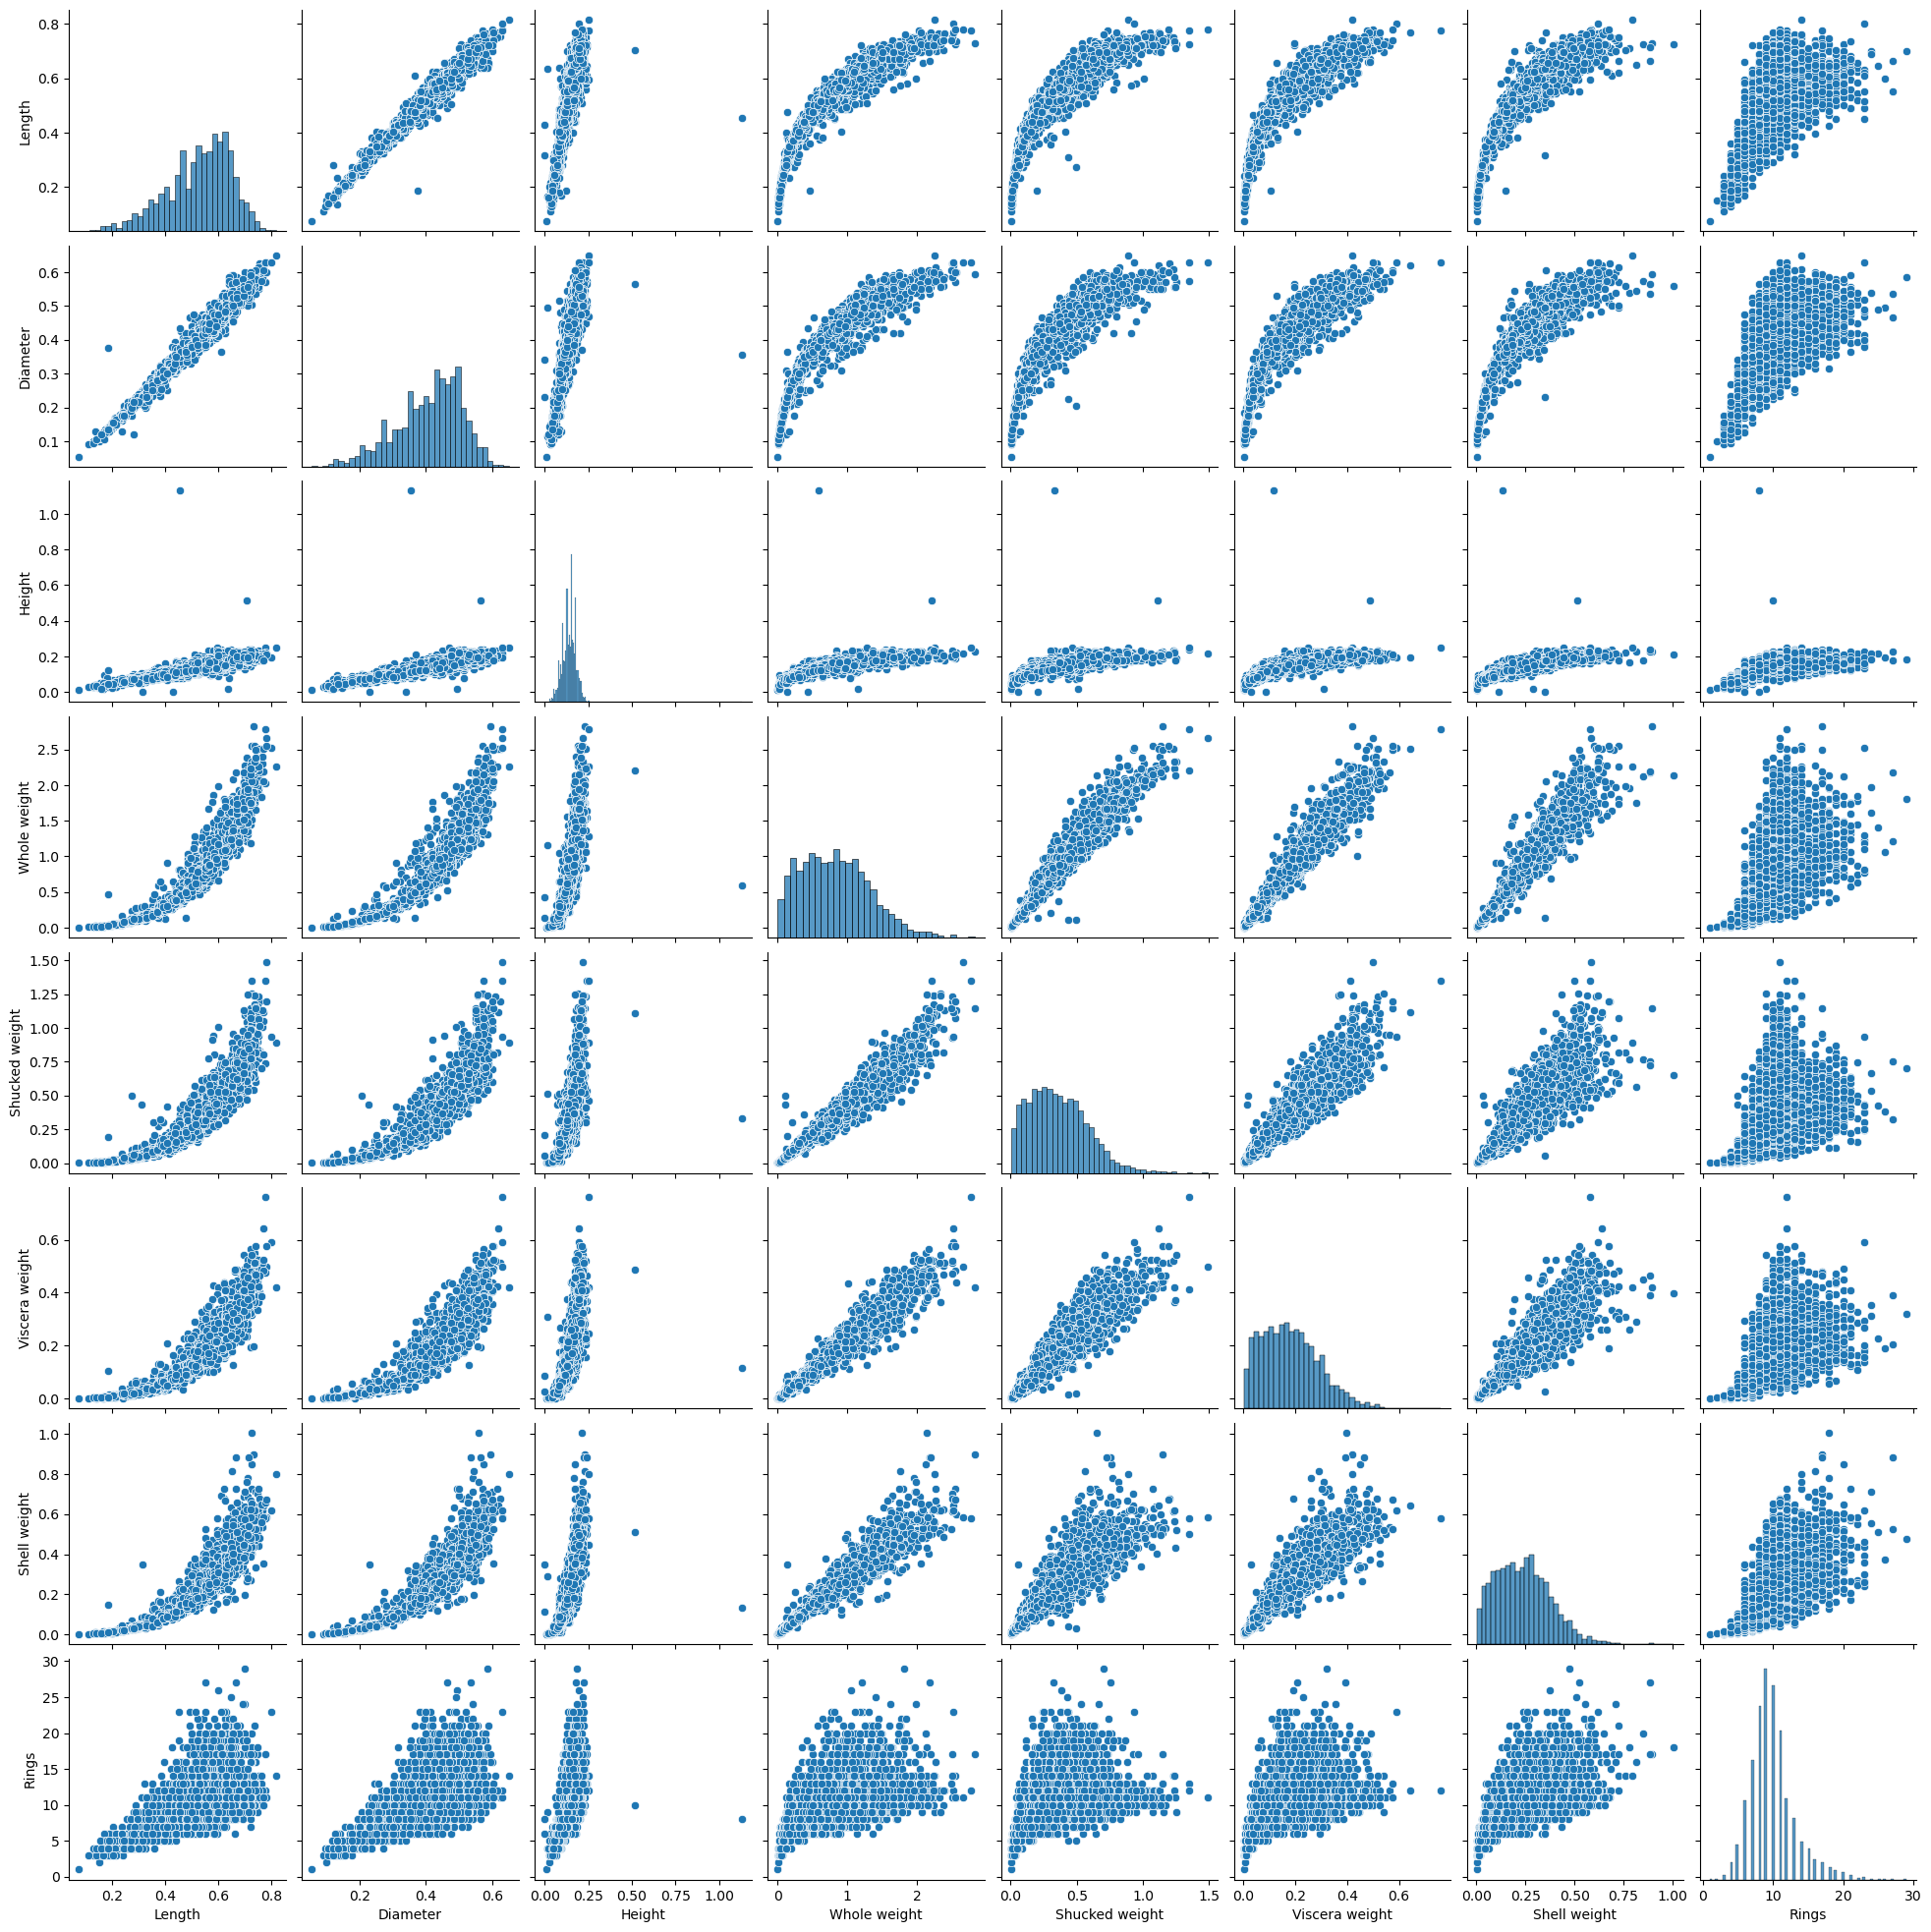

In [15]:
#Visualizing Pairplot
seaborn.pairplot(data)

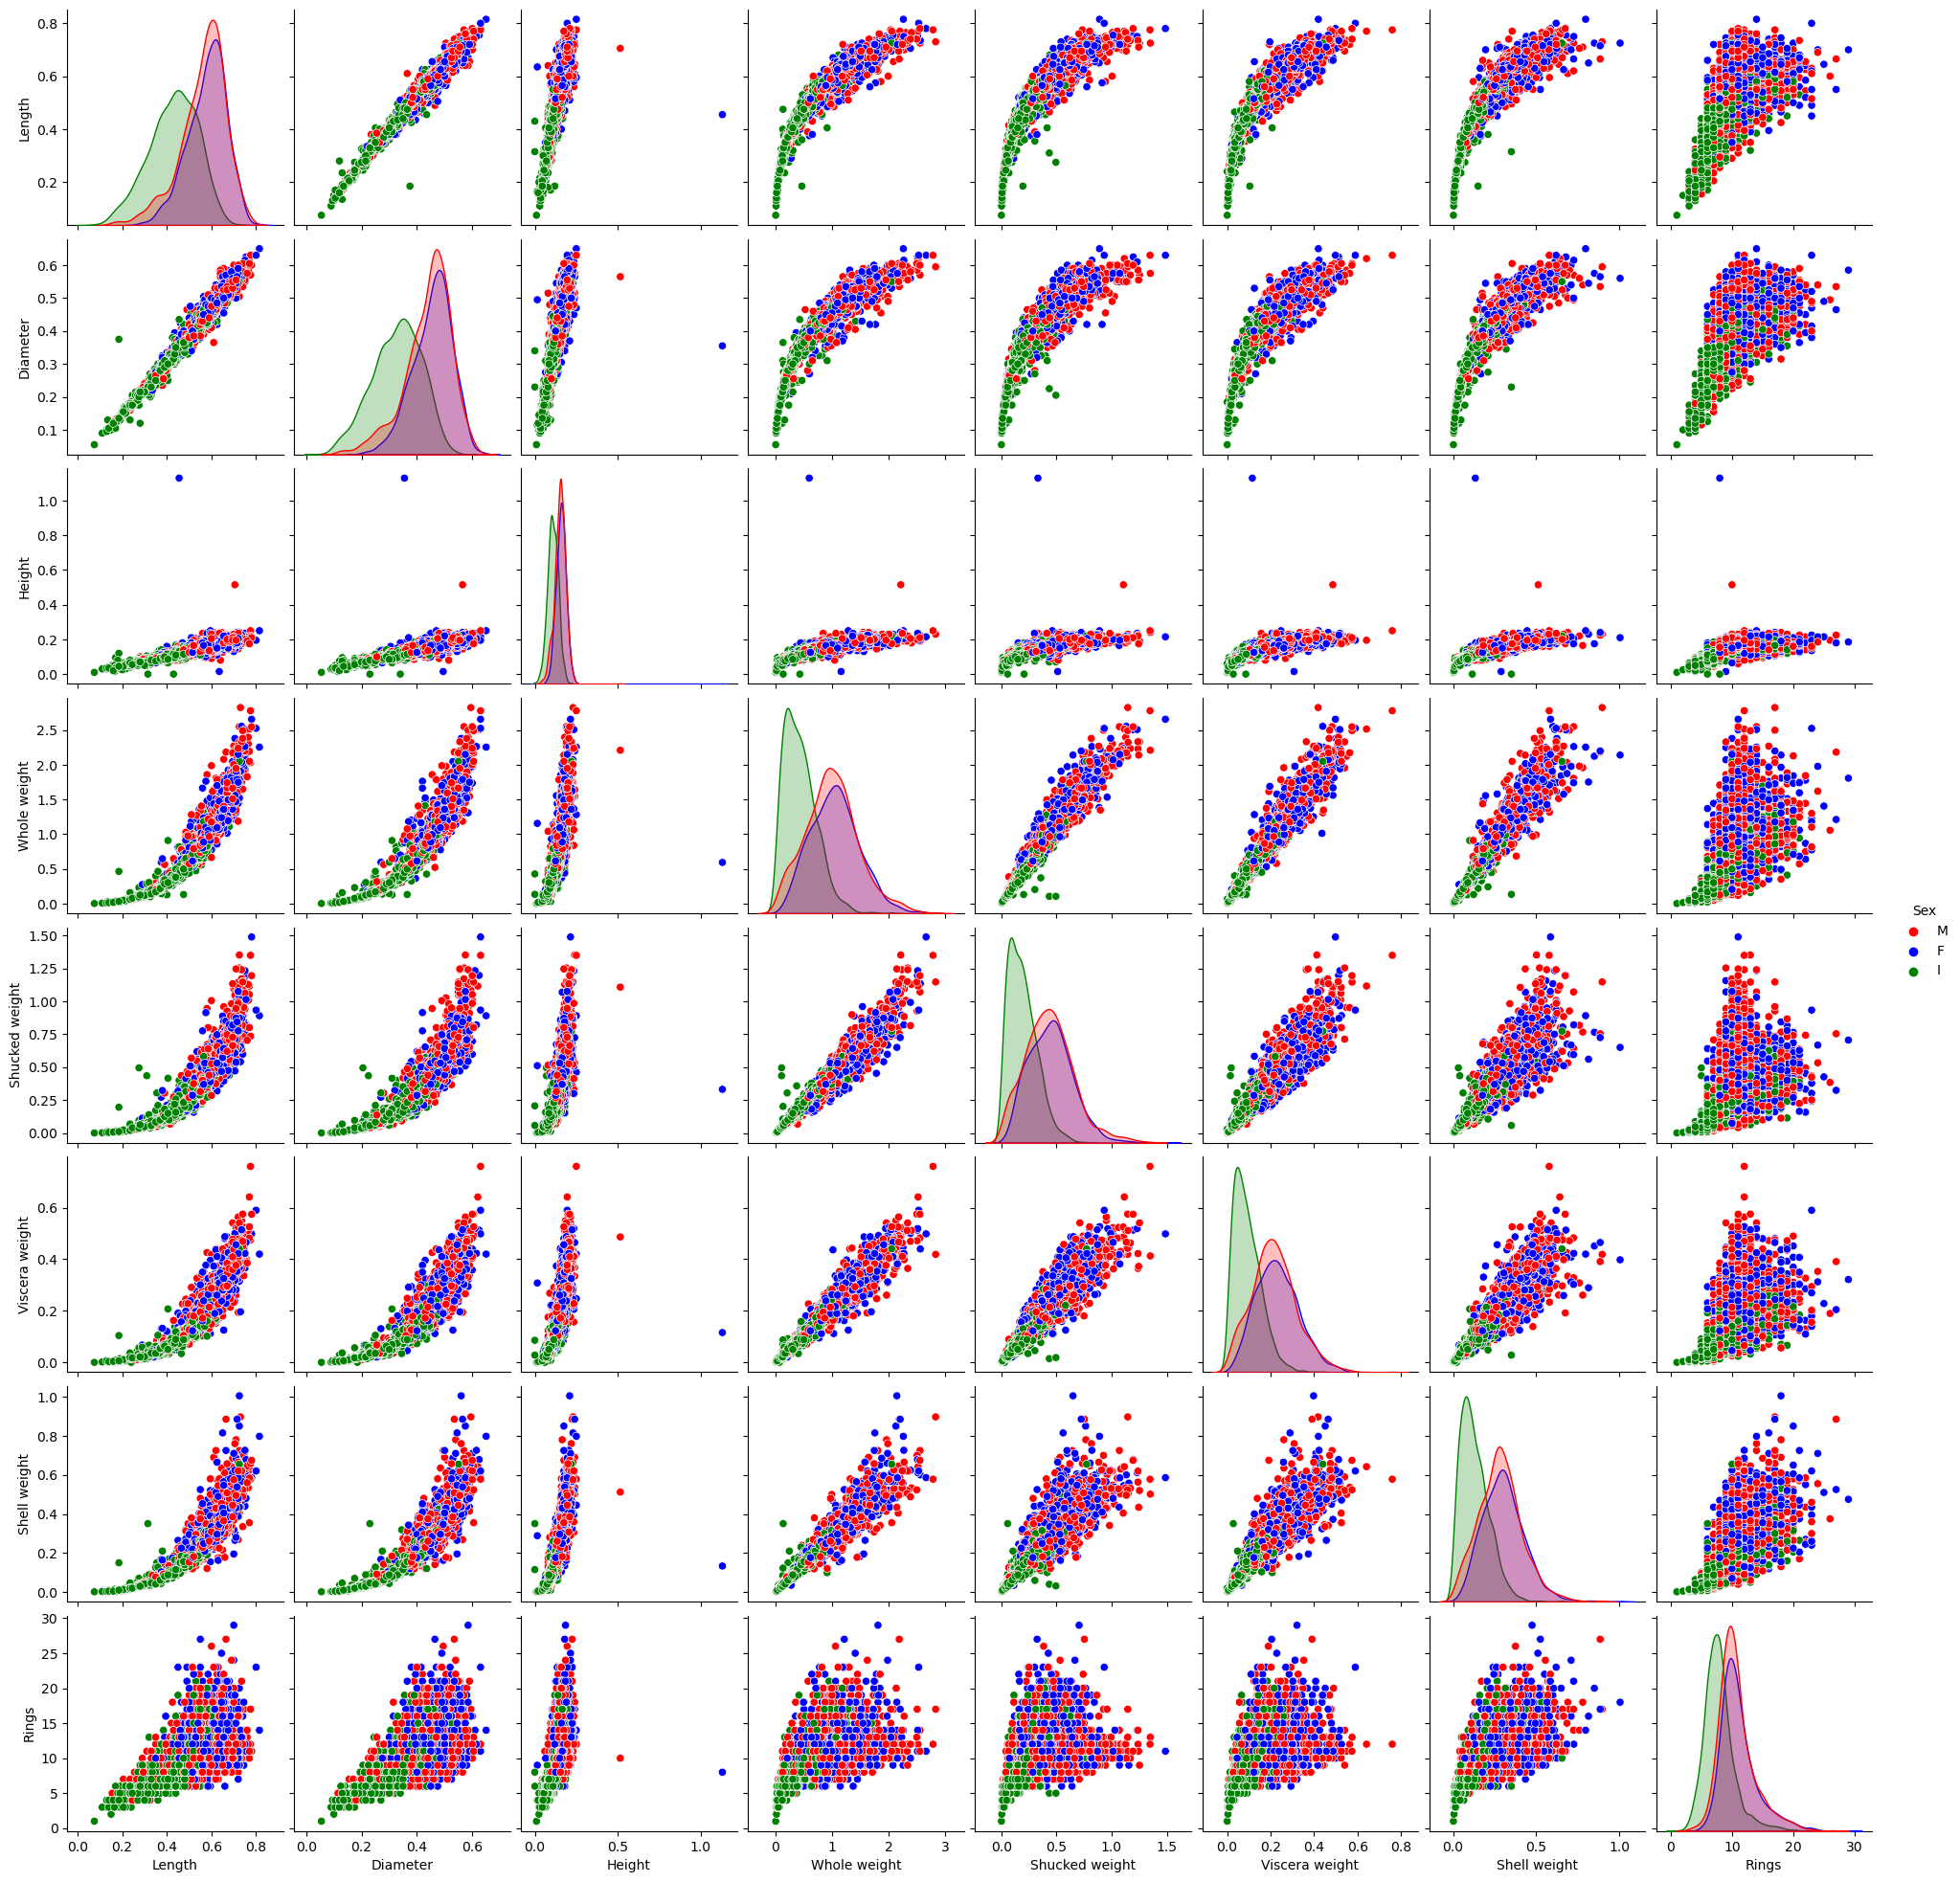

In [16]:
#Visualizing Pairplot for different sex
seaborn.pairplot(data, hue = 'Sex', palette = ['red', 'blue','green'])

<Axes: >

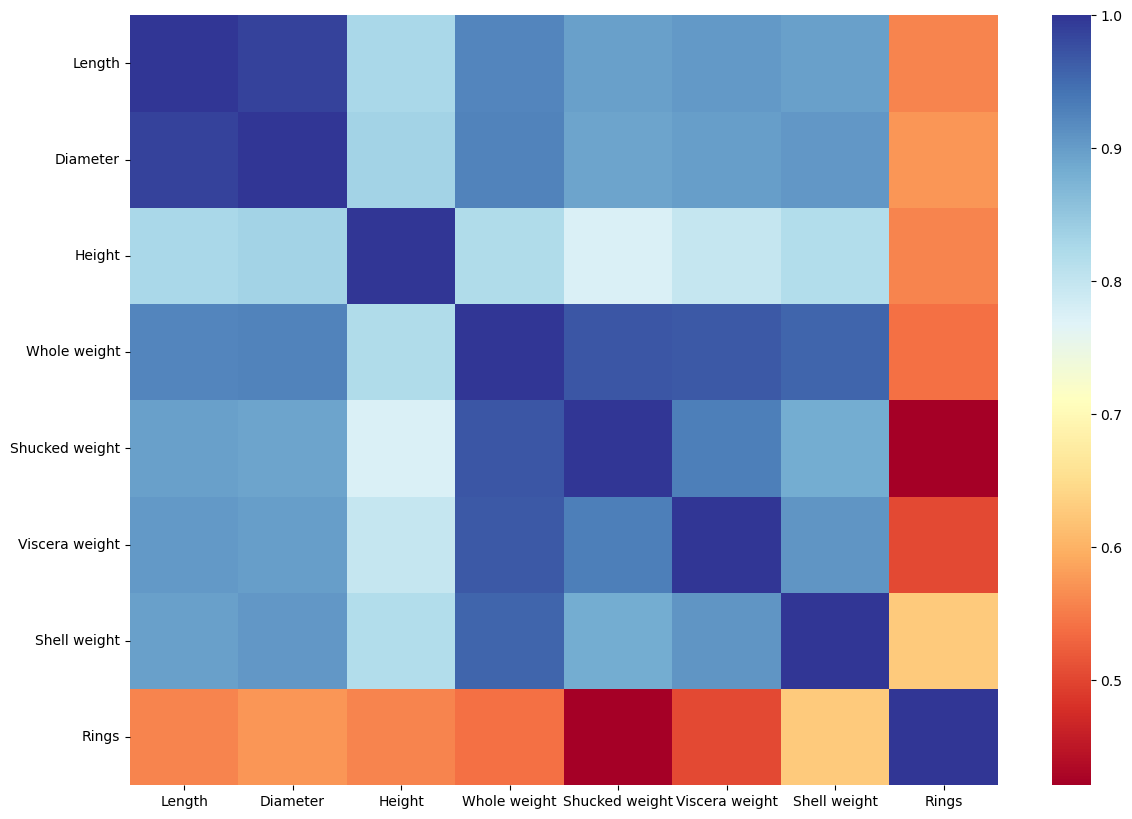

In [17]:
#For Heatmap
# Set the size of the heatmap
plt.figure(figsize=(14, 10))

# Create the heatmap
seaborn.heatmap(data_stats.corr(), cmap = 'RdYlBu')

In [18]:
#The correlation of the variables - Length, Diameter, Height and Shell Weight, with the output variable "Rings" is comparatively high.
# Hence, these variables are considered important.

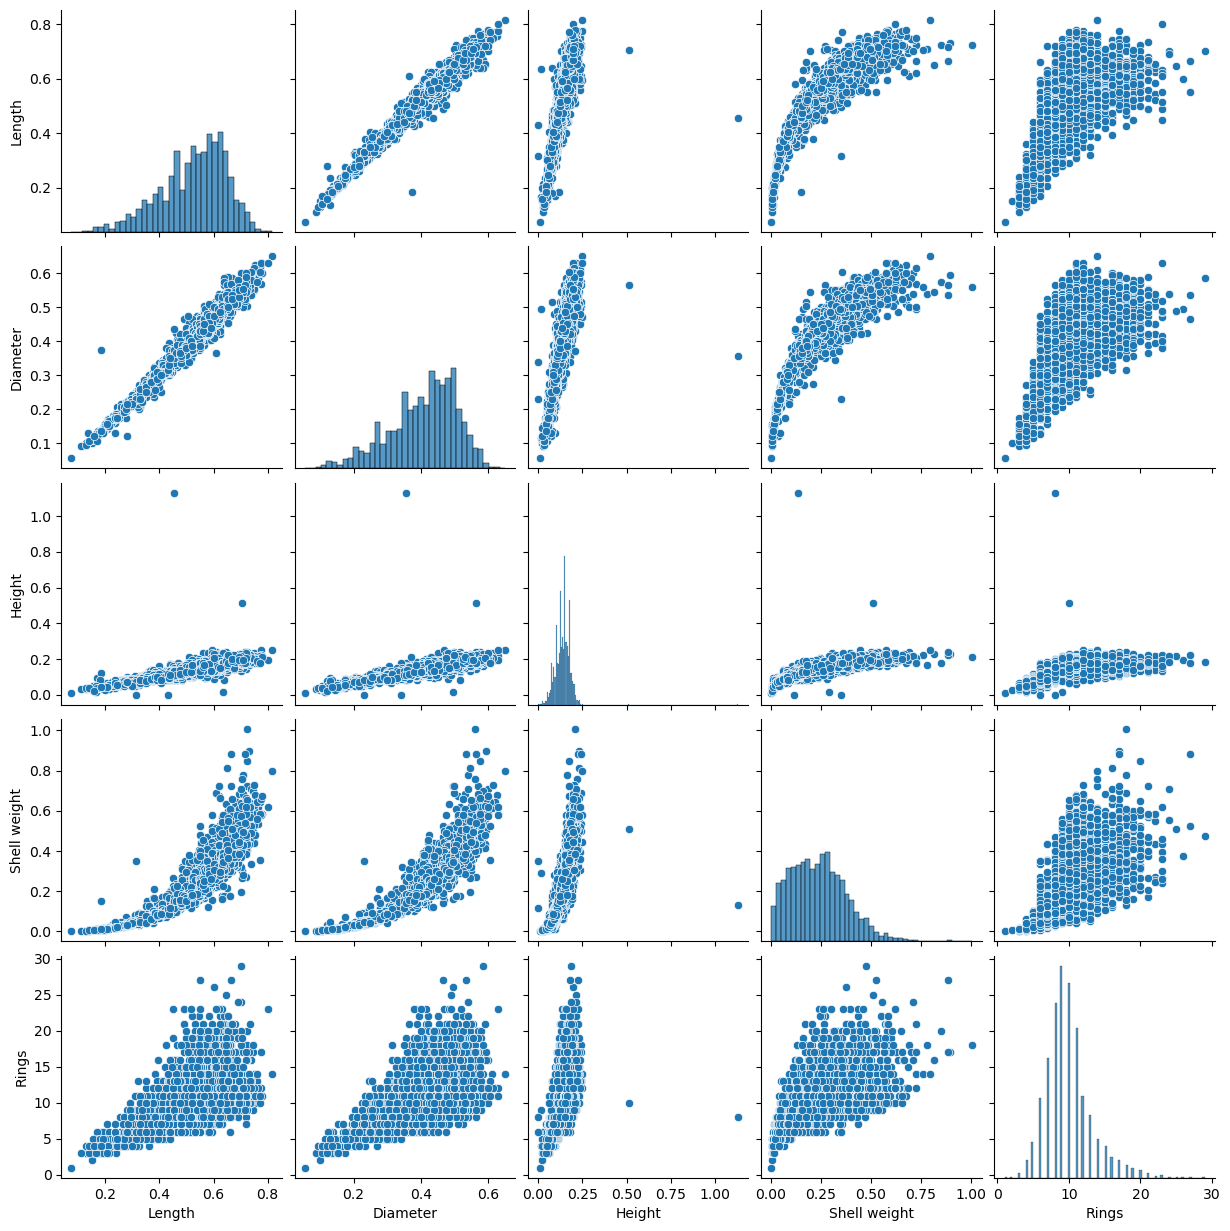

In [19]:
#Visualizing Pairplot with the important fratures.
seaborn.pairplot(data.drop(['Whole weight', 'Shucked weight', 'Viscera weight'], axis=1))

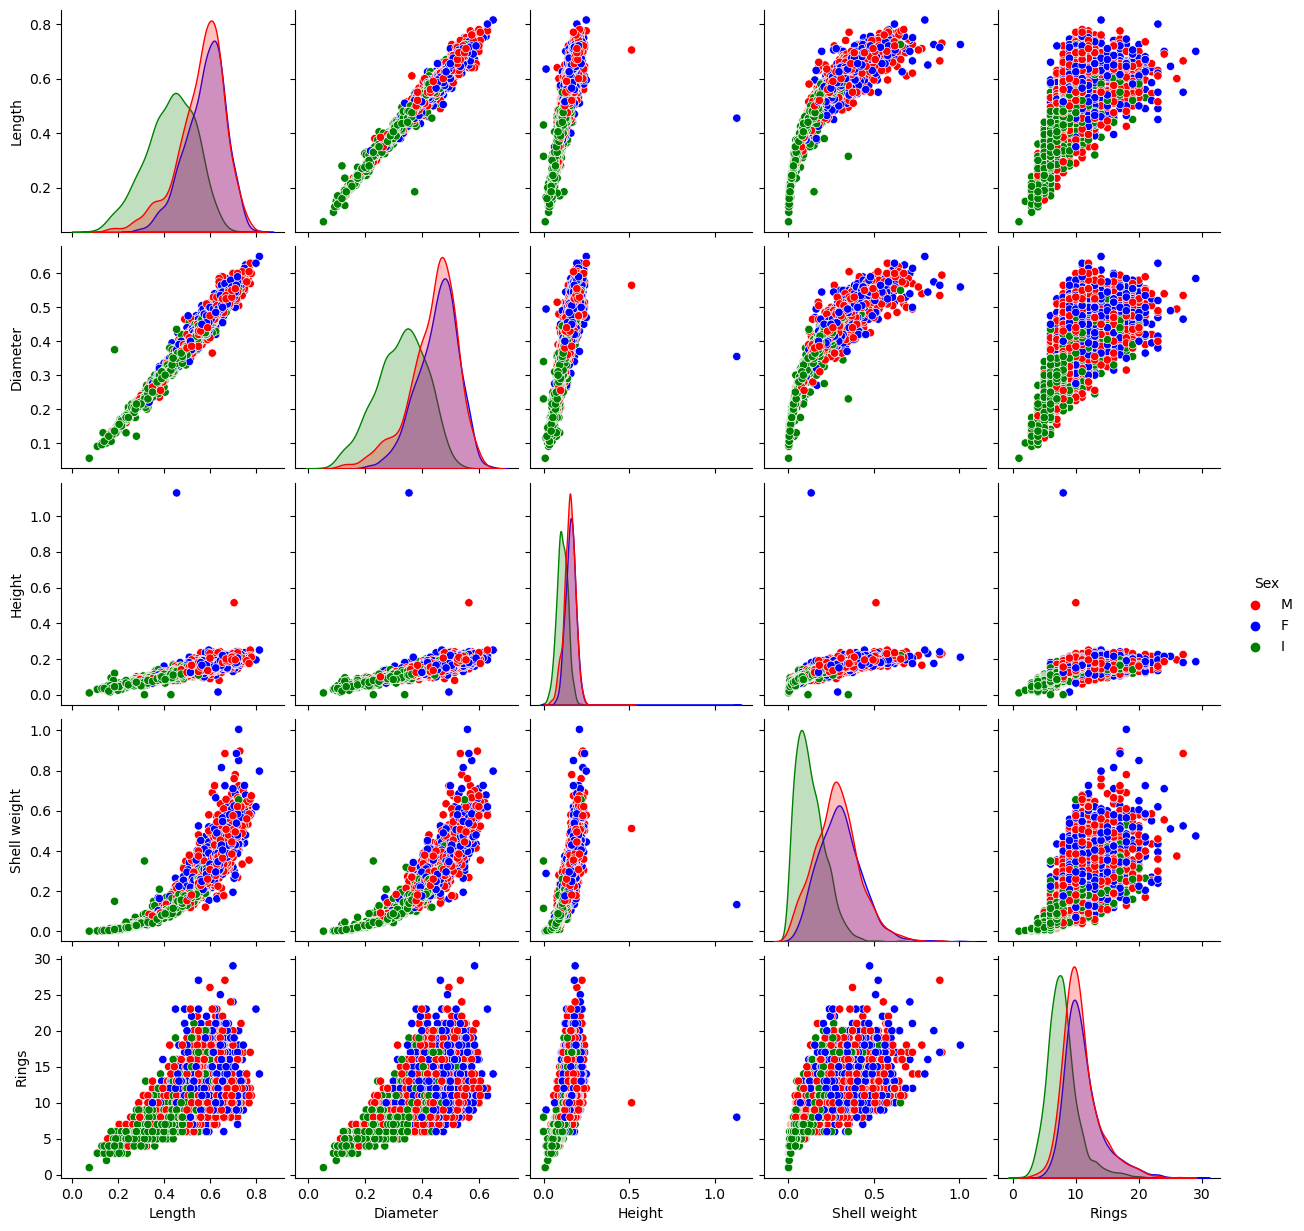

In [20]:
#Visualizing Pairplot for important fratures for different sex
seaborn.pairplot(data.drop(['Whole weight', 'Shucked weight', 'Viscera weight'], axis=1), hue = 'Sex', palette = ['red', 'blue','green'])

<Axes: xlabel='Rings', ylabel='count'>

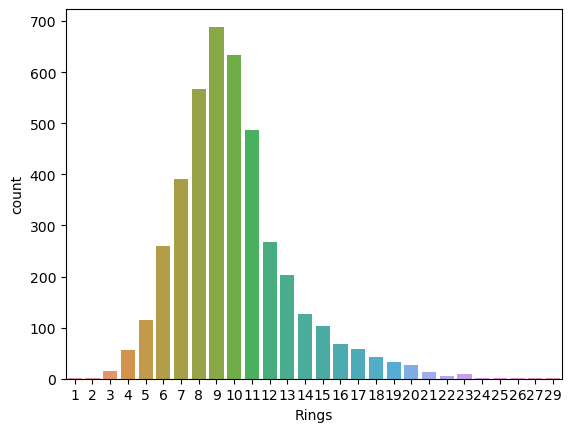

In [70]:
#To check if the data is balanced.
seaborn.countplot(data=data, x=data['Rings'])
# data['Rings'].value_counts(ascending=True)

In [22]:
#Performing one-hot encoding for categorical variables.
data_oh = pd.get_dummies(data = data)
data_oh[['Sex_F', 'Sex_I', 'Sex_M']] = data_oh[['Sex_F', 'Sex_I', 'Sex_M']].astype(int)
data_oh

Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0      0.455     0.365   0.095        0.5140          0.2245          0.1010   
1      0.350     0.265   0.090        0.2255          0.0995          0.0485   
2      0.530     0.420   0.135        0.6770          0.2565          0.1415   
3      0.440     0.365   0.125        0.5160          0.2155          0.1140   
4      0.330     0.255   0.080        0.2050          0.0895          0.0395   
...      ...       ...     ...           ...             ...             ...   
4172   0.565     0.450   0.165        0.8870          0.3700          0.2390   
4173   0.590     0.440   0.135        0.9660          0.4390          0.2145   
4174   0.600     0.475   0.205        1.1760          0.5255          0.2875   
4175   0.625     0.485   0.150        1.0945          0.5310          0.2610   
4176   0.710     0.555   0.195        1.9485          0.9455          0.3765   

      Shell weight  Rings  Sex_F  Sex_I  Sex_M  
0           0.1500     15      0      0      1  
1           0.0700      7      0      0      1  
2           0.2100      9      1      0      0  
3           0.1550     10      0      0      1  
4           0.0550      7      0      1      0  
...            ...    ...    ...    ...    ...  
4172        0.2490     11      1      0      0  
4173        0.2605     10      0      0      1  
4174        0.3080      9      0      0      1  
4175        0.2960     10      1      0      0  
4176        0.4950     12      0      0      1  

[4177 rows x 11 columns]

In [23]:
# Normalizing the numerical data except the outcome variable(Rings).
data_stats[['Sex_F', 'Sex_I', 'Sex_M']] = data_oh[['Sex_F', 'Sex_I', 'Sex_M']]
data_zsn_pre = data_stats.drop(['Rings'], axis = 1)
data_zsn = data_zsn_pre.apply(stats.zscore)
data_zsn['Rings'] = data_stats['Rings']
data_zsn

Length  Diameter    Height  Whole weight  Shucked weight  \
0    -0.574558 -0.432149 -1.064424     -0.641898       -0.607685   
1    -1.448986 -1.439929 -1.183978     -1.230277       -1.170910   
2     0.050033  0.122130 -0.107991     -0.309469       -0.463500   
3    -0.699476 -0.432149 -0.347099     -0.637819       -0.648238   
4    -1.615544 -1.540707 -1.423087     -1.272086       -1.215968   
...        ...       ...       ...           ...             ...   
4172  0.341509  0.424464  0.609334      0.118813        0.047908   
4173  0.549706  0.323686 -0.107991      0.279929        0.358808   
4174  0.632985  0.676409  1.565767      0.708212        0.748559   
4175  0.841182  0.777187  0.250672      0.541998        0.773341   
4176  1.549052  1.482634  1.326659      2.283681        2.640993   

      Viscera weight  Shell weight     Sex_F     Sex_I     Sex_M  Rings  
0          -0.726212     -0.638217 -0.674834 -0.688018  1.316677     15  
1          -1.205221     -1.212987 -0.674834 -0.688018  1.316677      7  
2          -0.356690     -0.207139  1.481846 -0.688018 -0.759488      9  
3          -0.607600     -0.602294 -0.674834 -0.688018  1.316677     10  
4          -1.287337     -1.320757 -0.674834  1.453451 -0.759488      7  
...              ...           ...       ...       ...       ...    ...  
4172        0.532900      0.073062  1.481846 -0.688018 -0.759488     11  
4173        0.309362      0.155685 -0.674834 -0.688018  1.316677     10  
4174        0.975413      0.496955 -0.674834 -0.688018  1.316677      9  
4175        0.733627      0.410739  1.481846 -0.688018 -0.759488     10  
4176        1.787449      1.840481 -0.674834 -0.688018  1.316677     12  

[4177 rows x 11 columns]

In [24]:
# Defining features and target variable:
x = data_zsn.drop('Rings', axis=1) # Dropping the output variable.
y = data_zsn['Rings']

# The data is randomly split and KNN is applied to obtain the accuracy of the model.
x_train, x_test, y_train, y_test = train_test_split(x,y)
neighbor = neighbors.KNeighborsClassifier()
neighbor.fit(x_train,y_train)
predicted_class = neighbor.predict(x_test)
accuracy = metrics.accuracy_score(y_test,predicted_class)
print(accuracy)

0.20956937799043063


In [73]:
# Split the dataset into training and testing sets (80/20):
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=18)

# The range of accuracy is calculated for range of k values using cross validation.
accuracy = []
k=1
while k <= 200:
    neighbor = neighbors.KNeighborsClassifier(n_neighbors = k)
    accuracy_value = cross_val_score(neighbor, x_train, y_train, cv=5, scoring='accuracy')
    accuracy.append(accuracy_value.mean())
    k=k+1

k_parameters = np.array(range(1,201))
performance = pd.DataFrame(accuracy, k_parameters, columns=['Accuracy'])
# performance

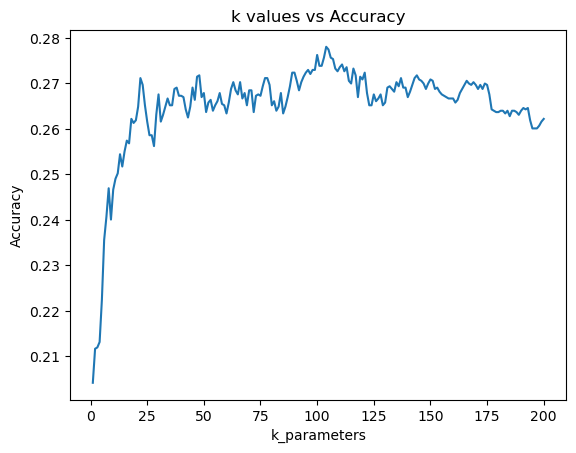

Maximum Accuracy =  0.2780658414113477


In [26]:
# Plotting the graph of k values vs accuracy.

plt.plot(k_parameters, accuracy)
plt.xlabel("k_parameters")
plt.ylabel("Accuracy")
plt.title("k values vs Accuracy")
plt.show()

max_accuracy = max(accuracy)
print("Maximum Accuracy = ", max_accuracy)

In [74]:
performance.loc[performance.Accuracy == max_accuracy]

Accuracy
104  0.278066

In [28]:
# Retriaining the KNN for the k value of 104 and calculating the accuracy on the held out test set.

neighbor = neighbors.KNeighborsClassifier(n_neighbors = 104)
neighbor.fit(x_train, y_train)
predicted_class = neighbor.predict(x_test)
accuracy = metrics.accuracy_score(y_test, predicted_class)
print(accuracy.mean())

0.26435406698564595


In [29]:
# Previously the accuracy on the optimum value of k=104 was 0.278, however, when it was tested on the held out test set the accuracy
# value for the same k value was observed as 0.264.

In [30]:
n_uniform = neighbors.KNeighborsClassifier(n_neighbors = 104, weights='uniform')
n_uniform.fit(x_train, y_train)
predicted_class = n_uniform.predict(x_test)
accuracy = metrics.accuracy_score(y_test, predicted_class)
print(accuracy.mean())

0.26435406698564595


In [31]:
n_uniform = neighbors.KNeighborsClassifier(n_neighbors = 104, weights='distance')
n_uniform.fit(x_train, y_train)
predicted_class = n_uniform.predict(x_test)
accuracy = metrics.accuracy_score(y_test, predicted_class)
print(accuracy.mean())

0.26555023923444976


In [32]:
# There is difference between the accuracy. If distance weight is considered then the model has more accuracy than with uniform weight.

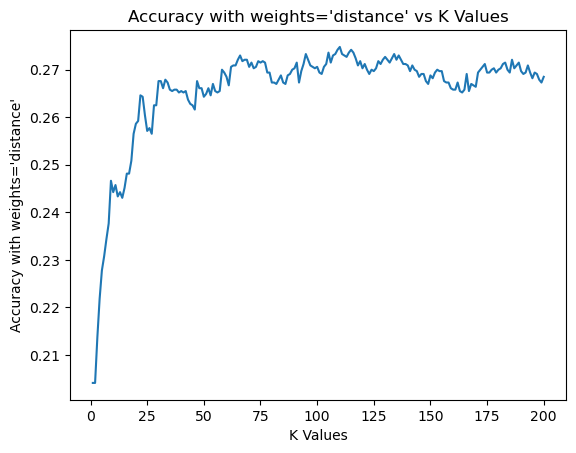

Accuracy
110  0.274773

In [56]:
# Implement KNN with default weight distance and plotting the accuracy vs the k values.

accuracy_default = []
k=1
while k<=200:
    neighbor=neighbors.KNeighborsClassifier(n_neighbors = k, weights='distance')
    accu_score_default=cross_val_score(neighbor, x_train, y_train, cv=5, scoring='accuracy')
    accuracy_default.append(accu_score_default.mean())
    k+=1

k_parameters = np.array(range(1,201))
performance_d = pd.DataFrame(accuracy_default, k_parameters, columns=['Accuracy'])
# performance_d

plt.plot(k_parameters, accuracy_default)
plt.xlabel("K Values")
plt.ylabel("Accuracy with weights='distance'")
plt.title("Accuracy with weights='distance' vs K Values")
plt.show()

performance_d.loc[performance_d.Accuracy == max(accuracy_default)]

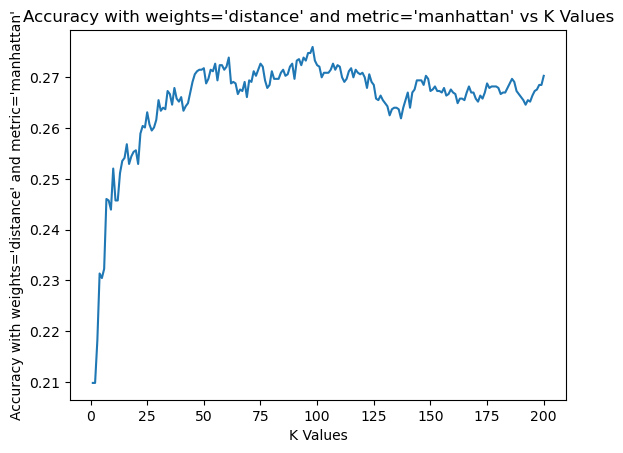

Accuracy
98   0.27597

In [57]:
# Implement KNN with Manhattan weight distance and plotting the accuracy vs the k values.

accuracy_manhattan = []
k=1
while k<=200:
    neighbor=neighbors.KNeighborsClassifier(n_neighbors = k, weights='distance', metric='manhattan')
    accu_score_m=cross_val_score(neighbor, x_train, y_train, cv=5, scoring='accuracy')
    accuracy_manhattan.append(accu_score_m.mean())
    k+=1

k_parameters = np.array(range(1,201))
performance_m = pd.DataFrame(accuracy_manhattan, k_parameters, columns=['Accuracy'])
# performance_m

plt.plot(k_parameters, accuracy_manhattan)
plt.xlabel("K Values")
plt.ylabel("Accuracy with weights='distance' and metric='manhattan'")
plt.title("Accuracy with weights='distance' and metric='manhattan' vs K Values")
plt.show()

performance_m.loc[performance_m.Accuracy == max(accuracy_manhattan)]

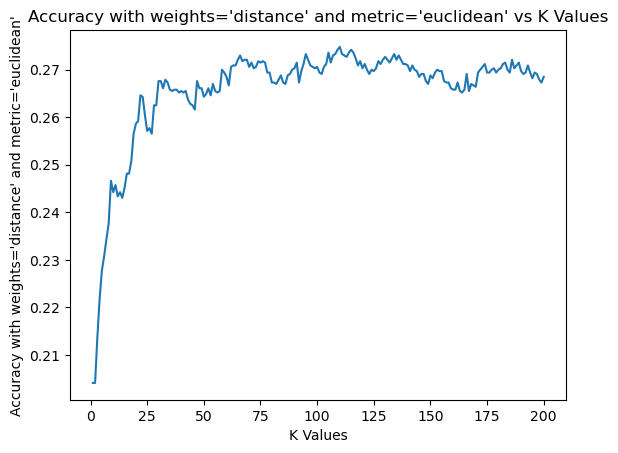

Accuracy
110  0.274773

In [59]:
# Implement KNN with Euclidean weight distance and plotting the accuracy vs the k values.

accuracy_euclidean = []
k=1
while k<=200:
    neighbor=neighbors.KNeighborsClassifier(n_neighbors = k, weights='distance', metric='euclidean')
    accu_score_e=cross_val_score(neighbor, x_train, y_train, cv=5, scoring='accuracy')
    accuracy_euclidean.append(accu_score_e.mean())
    k+=1

k_parameters = np.array(range(1,201))
performance_e = pd.DataFrame(accuracy_euclidean, k_parameters, columns=['Accuracy'])
# performance_e

plt.plot(k_parameters, accuracy_euclidean)
plt.xlabel("K Values")
plt.ylabel("Accuracy with weights='distance' and metric='euclidean'")
plt.title("Accuracy with weights='distance' and metric='euclidean' vs K Values")
plt.show()

performance_e.loc[performance_e.Accuracy == max(accuracy_euclidean)]

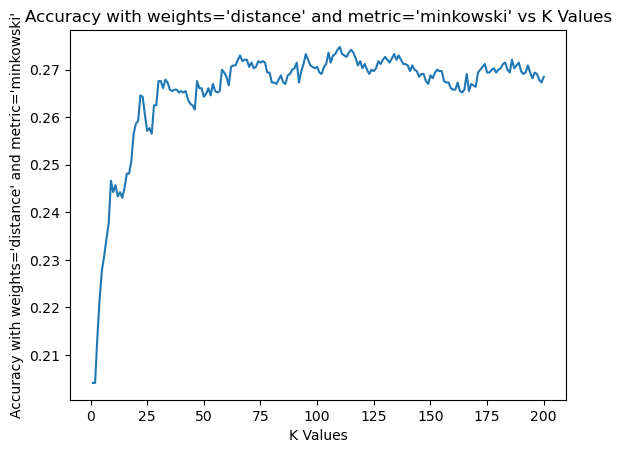

Accuracy
110  0.274773

In [61]:
# Implement KNN with Minkowski weight distance and plotting the accuracy vs the k values.

accuracy_minkowski = []
k=1
while k<=200:
    neighbor=neighbors.KNeighborsClassifier(n_neighbors = k, weights='distance',p=2, metric='minkowski')
    accu_score_mk=cross_val_score(neighbor, x_train, y_train, cv=5, scoring='accuracy')
    accuracy_minkowski.append(accu_score_mk.mean())
    k+=1

k_parameters = np.array(range(1,201))
performance_mk = pd.DataFrame(accuracy_minkowski, k_parameters, columns=['Accuracy'])
# performance_mk

plt.plot(k_parameters, accuracy_minkowski)
plt.xlabel("K Values")
plt.ylabel("Accuracy with weights='distance' and metric='minkowski'")
plt.title("Accuracy with weights='distance' and metric='minkowski' vs K Values")
plt.show()

performance_mk.loc[performance_mk.Accuracy == max(accuracy_minkowski)]

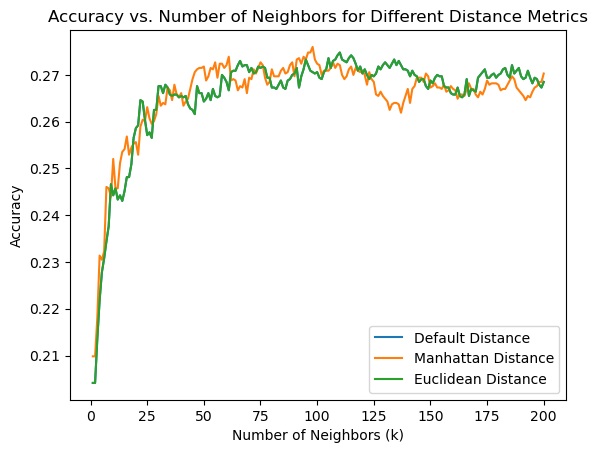

    Accuracy
98   0.27597
     Accuracy
110  0.274773
     Accuracy
110  0.274773


In [84]:
# Plotting the accuracy for default distance
plt.plot(k_parameters, accuracy_default, label='Default Distance')

# Plotting the accuracy for Manhattan distance
plt.plot(k_parameters, accuracy_manhattan, label='Manhattan Distance')

# Plotting the accuracy for Euclidean distance
plt.plot(k_parameters, accuracy_euclidean, label='Euclidean Distance')

# Adding labels and legend
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors for Different Distance Metrics')
plt.legend()

# Displaying the plot
plt.show()

print(performance_m.loc[performance_m.Accuracy == max(accuracy_manhattan)])
print(performance_d.loc[performance_d.Accuracy == max(accuracy_default)])
print(performance_e.loc[performance_e.Accuracy == max(accuracy_euclidean)])

In [ ]:
# It is evident from the above graph that the accuracy obtained from default distance and euclidean distance is the same, however, that of
# Manhattan distance is different. Also, the maximum accuracy obtained by Manhattan distance is at k=98, but in the other two, the value of
# k=110 for maximum accuracy.